## Setup

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LN

## Question 1

In [2]:
img_hough = cv.imread('coins_1.jfif')
blur = cv.medianBlur(img_hough, 5)
gray = cv.cvtColor(blur, cv.COLOR_BGR2GRAY)


# Hough circle transform
row = img_hough.shape[0]
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, row/8, param1 = 150, 
                         param2 = 25)

if circles is not None:
    circles = np.uint8(np.around(circles))
    for i in circles[0]:
        # draw the center of the circle
        center = (i[0], i[1])
        cv.circle(img_hough, center, 1, (100, 100, 100), 3)
        # draw the whole circle
        radius = i[2]
        cv.circle(img_hough, center, radius, (255, 0, 0), 2)

# Blob detection
img_blob = cv.imread('coins_1.jfif')


# parameter setting
params = cv.SimpleBlobDetector_Params()

# turn off the filter
params.filterByColor = True
params.blobColor = 255
params.filterByArea = True
params.minArea = 1000
params.filterByConvexity = False
params.filterByInertia = False

# detector
detector = cv.SimpleBlobDetector_create(params)
keypoints = detector.detect(gray)

# draw
im_keypoints = cv.drawKeypoints(img_blob, keypoints, np.array([]), (0, 0, 255), 
                               cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv.imshow('result', np.hstack((img_hough, im_keypoints)))
cv.waitKey(0)
cv.destroyAllWindows()

Hough circle transform: The edge produced is thicker, more coins are detected and drawn on the edge of the coins

Blob detection: The steps is complex compared Hough circle transform. The output is more clearer since the edge produced is not thick.

## Question 2

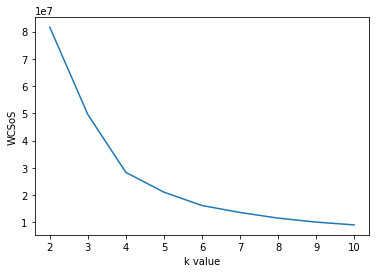

In [3]:
# Create the BGR image and HSV image
img = cv.imread('zebra.jfif')
img_bgr = img.copy()
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# reshape the image
img_reshape = img_bgr.reshape((-1, 3))
img_reshape = np.float32(img_reshape)

img_hsv_reshape = img_hsv.reshape((-1, 3))
img_hsv_reshape = np.float32(img_hsv_reshape)

# array for storing k value and ret
k_value = np.array([])
WCSS = np.array([])

# test k value
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts = 10
for k in range(2, 11): #Range from 2 to 10
    ret, label, center = cv.kmeans(img_reshape, k, None, criteria, attempts, 
                               cv.KMEANS_PP_CENTERS)
    k_value = np.append(k_value, k)
    WCSS = np.append(WCSS, ret)   
    
# plot the graph
plt.plot(k_value, WCSS)
plt.xlabel('k value'), plt.ylabel('WCSoS')
plt.show()

Optimal k = 4

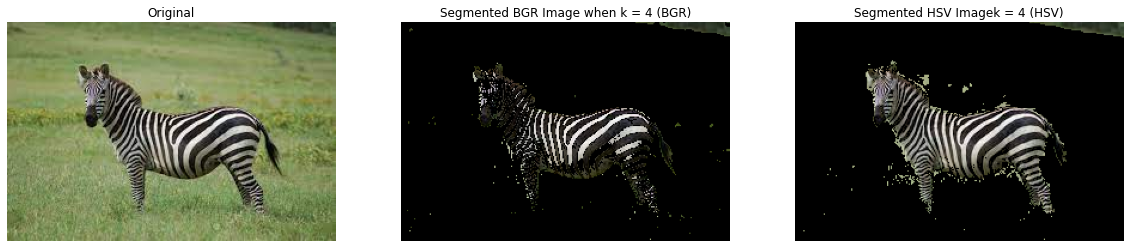

In [4]:
# Apply k-means clustering on BGR and HSV image with k = 4
K = 4
ret, label, center = cv.kmeans(img_reshape, K, None, criteria, attempts, 
                               cv.KMEANS_PP_CENTERS)
ret2, label2, center2 = cv.kmeans(img_hsv_reshape, K, None, criteria, 
                                  attempts, cv.KMEANS_PP_CENTERS)

# Convert the center to np.uint8
center = np.uint8(center)
res = center[label.flatten()]
result_img = res.reshape(img_bgr.shape)

center2 = np.uint8(center2)
res2 = center2[label2.flatten()]
result_img_hsv = res2.reshape(img_hsv.shape)

# Define black and white for BGR image
white_color = (255, 255, 255)
black_color = (0, 0, 0)

# white
white = np.argmin(LN.norm(white_color - center, axis = 1))
white_mask = result_img == center[white]
seg_img_white = img_bgr*(white_mask.astype("uint8"))

# black
black = np.argmin(LN.norm(black_color - center, axis = 1))
black_mask = result_img == center[black]
seg_img_black = img_bgr*(black_mask.astype("uint8"))

seg_img = cv.bitwise_or(seg_img_black, seg_img_white, mask = None)

# define black and white for HSV image
white_color_hsv = (0, 0, 255)
black_color_hsv = (0, 0, 0)

# white
white2 = np.argmin(LN.norm(white_color_hsv - center2, axis = 1))
white2_mask = result_img_hsv == center2[white2]
seg_img2_white = img_hsv*(white2_mask.astype("uint8"))

# black
black2 = np.argmin(LN.norm(black_color_hsv - center2, axis = 1))
black2_mask = result_img_hsv == center2[black2]
seg_img2_black = img_hsv*(black2_mask.astype("uint8"))

seg_img_hsv = cv.bitwise_or(seg_img2_black, seg_img2_white, mask = None)

# display the segmented images
plt.figure(figsize = (20, 20))
plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original'), plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(seg_img, cv.COLOR_BGR2RGB))
plt.title(f'Segmented BGR Image when k = {K} (BGR)'), plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(seg_img_hsv, cv.COLOR_HSV2RGB))
plt.title(f'Segmented HSV Imagek = {K} (HSV)'), plt.axis("off")
plt.show()

HSV is better in this case because more details of zebra obtained compared to BGR color space